# PDP
- partial dependence plot

참고 문헌 :\
https://blogsaskorea.com/116 (한글자료) \
https://www.sas.com/content/dam/SAS/support/en/sas-global-forum-proceedings/2018/1950-2018.pdf (기반논문)

A partial dependence plot depicts the functional relationship between a small number of model inputs (generally one or two inputs) and a model’s predictions. PD plots are thus named because they show how the model’s predictions partially depend on values of the input variables of interest.  

- 단일입력값(partial)에 결과가 어떻게 의존하는지(dependece)에 대한 그림(plot)
- 관심변수가 변화함에 따라 예측결과가 변화하는 양상을 그래프로 표현해줌
- 변수간의 상호작용도 고려해줌
- 관심변수가 다른 설명변수와 독립이라는 가정이 필요

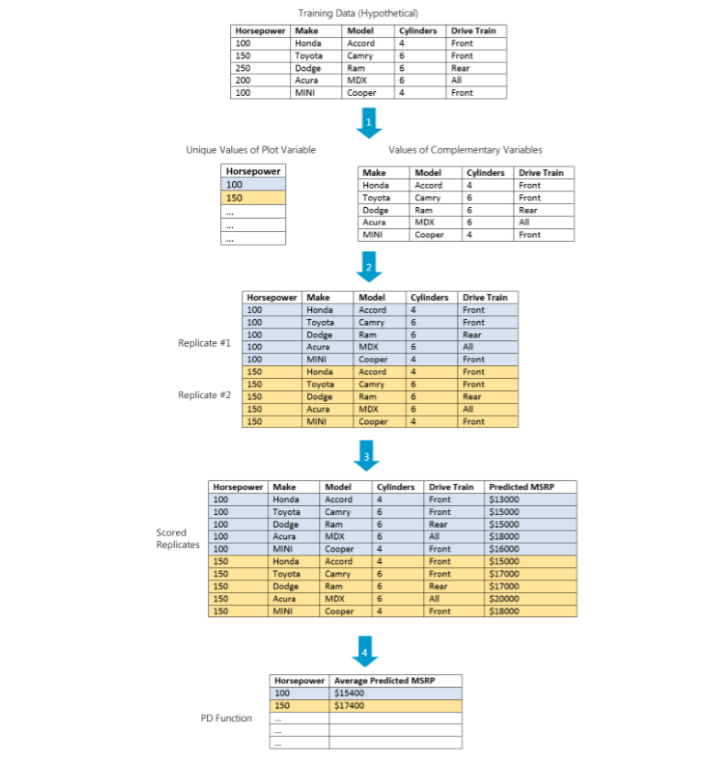

## 1. Import Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import cross_validate

from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [2]:
from matplotlib import font_manager, rc, rcParams

def set_korea_font():
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
    rcParams.update({'font.size': 11})
    rcParams['axes.unicode_minus'] = False  
set_korea_font()

In [3]:
house = pd.read_csv('kc_house_data.csv')
dum = pd.read_csv('dummy.csv').iloc[:,2:]
dum.columns = ['밸뷰(배드타운)','메디나(부촌)','타코마 및 교외']
house = pd.merge(house,dum,left_index=True,right_index=True)

In [4]:
print(house.shape)
house.head()

(21613, 24)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,밸뷰(배드타운),메디나(부촌),타코마 및 교외
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,1955,0,98178,47.5112,-122.257,1340,5650,0,0,1
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,1951,1991,98125,47.7210,-122.319,1690,7639,0,0,0
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,1933,0,98028,47.7379,-122.233,2720,8062,0,0,0
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,1965,0,98136,47.5208,-122.393,1360,5000,0,0,0
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,1987,0,98074,47.6168,-122.045,1800,7503,1,0,0


In [5]:
x_dt=house[['bedrooms', 'bathrooms', 'sqft_living','sqft_lot', 'floors', 'grade', 'sqft_above','condition', 'sqft_lot15',
         'waterfront', 'yr_built', 'sqft_living15','view','밸뷰(배드타운)','메디나(부촌)','타코마 및 교외']]
y_dt = house['price']

In [6]:
dt = DecisionTreeRegressor()

In [7]:
scaler = StandardScaler()
scaler.fit(x_dt)
x_dts = pd.DataFrame(scaler.transform(x_dt), columns=x_dt.columns)
x_dts.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,grade,sqft_above,condition,sqft_lot15,waterfront,yr_built,sqft_living15,view,밸뷰(배드타운),메디나(부촌),타코마 및 교외
0,-0.398737,-1.447464,-0.979835,-0.228321,-0.915427,-0.558836,-0.734708,-0.629187,-0.260715,-0.087173,-0.544898,-0.943355,-0.305759,-0.559947,-0.210615,1.702483
1,-0.398737,0.175607,0.533634,-0.189885,0.936506,-0.558836,0.460841,-0.629187,-0.187868,-0.087173,-0.681079,-0.432686,-0.305759,-0.559947,-0.210615,-0.587377
2,-1.473959,-1.447464,-1.426254,-0.123298,-0.915427,-1.409587,-1.229834,-0.629187,-0.172375,-0.087173,-1.293892,1.070140,-0.305759,-0.559947,-0.210615,-0.587377
3,0.676485,1.149449,-0.130550,-0.244014,-0.915427,-0.558836,-0.891699,2.444294,-0.284522,-0.087173,-0.204446,-0.914174,-0.305759,-0.559947,-0.210615,-0.587377
4,-0.398737,-0.149007,-0.435422,-0.169653,-0.915427,0.291916,-0.130895,-0.629187,-0.192849,-0.087173,0.544548,-0.272190,-0.305759,1.785883,-0.210615,-0.587377


In [41]:
from sklearn.inspection import plot_partial_dependence

In [42]:
ada = AdaBoostRegressor(random_state=42)
ada.fit(x_dt,y_dt)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(criterion='mse',
                                                       max_depth=None,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                                                       presort=False,
                                                       random_state=None,
                                                       splitter='best'),
                  learning_rate=1.4, loss='linear', n_estimators=30,
                  rando

## 2. one-way PDP

In [43]:
x_dt.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,grade,sqft_above,condition,sqft_lot15,waterfront,yr_built,sqft_living15,view,밸뷰(배드타운),메디나(부촌),타코마 및 교외
0,3,1.00,1180,5650,1.0,7,1180,3,5650,0,1955,1340,0,0,0,1
1,3,2.25,2570,7242,2.0,7,2170,3,7639,0,1951,1690,0,0,0,0
2,2,1.00,770,10000,1.0,6,770,3,8062,0,1933,2720,0,0,0,0
3,4,3.00,1960,5000,1.0,7,1050,5,5000,0,1965,1360,0,0,0,0
4,3,2.00,1680,8080,1.0,8,1680,3,7503,0,1987,1800,0,1,0,0


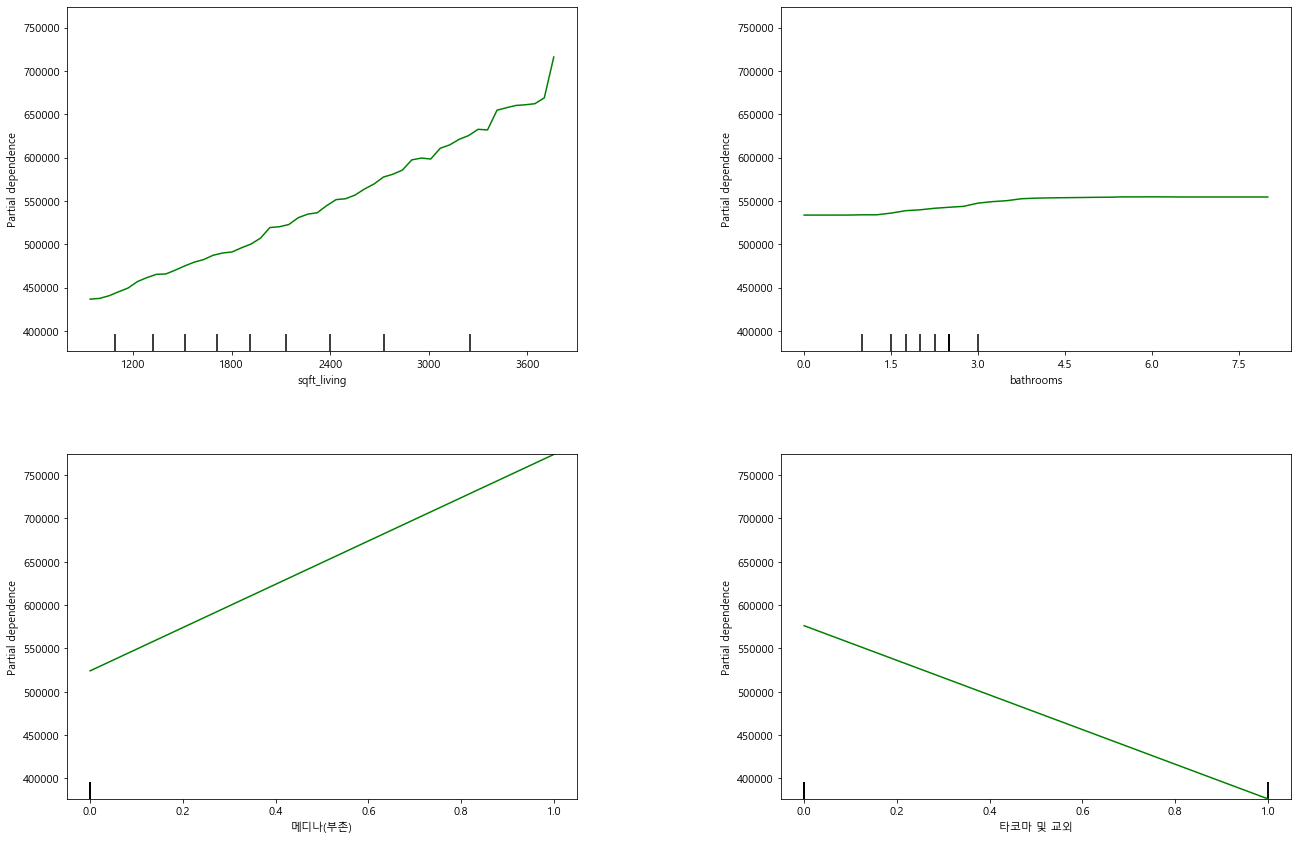

In [44]:
fig= plt.figure(figsize=(20,20))
features = [2,1,14,15] #관심있는 피쳐가 몇번째에 있는지를 넣어줌
plot_partial_dependence(ada, x_dt,features=features,grid_resolution=50,feature_names=x_dt.columns,n_cols=2,fig=fig)
plt.show()

화장실개수는 sqft_living보다 집가격에 영향을 덜 미친다.\
메디나에 속할 때와 속하지않을때, 타코마에 속할때와 아닐때의 가격차이 또한 알 수 있다

pdp를 그리기 위해서는 막대한 계산이 필요함

one-way의 경우
- 디폴트 그리드 100개 * 테이블 행수 20000개 => 200만개 테이블을 계산

two-way의 경우
- 디폴트 그리드 100개 * 디폴트 그리드 100개 * 테이블 행수 20000개 => 2억개 테이블을 계산

=> 샘플링으로 계산량을 줄일 수 있음

In [123]:
from sklearn.utils.random import sample_without_replacement

In [124]:
x_dt.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,grade,sqft_above,condition,sqft_lot15,waterfront,yr_built,sqft_living15,view,밸뷰(배드타운),메디나(부촌),타코마 및 교외
0,3,1.00,1180,5650,1.0,7,1180,3,5650,0,1955,1340,0,0,0,1
1,3,2.25,2570,7242,2.0,7,2170,3,7639,0,1951,1690,0,0,0,0
2,2,1.00,770,10000,1.0,6,770,3,8062,0,1933,2720,0,0,0,0
3,4,3.00,1960,5000,1.0,7,1050,5,5000,0,1965,1360,0,0,0,0
4,3,2.00,1680,8080,1.0,8,1680,3,7503,0,1987,1800,0,1,0,0


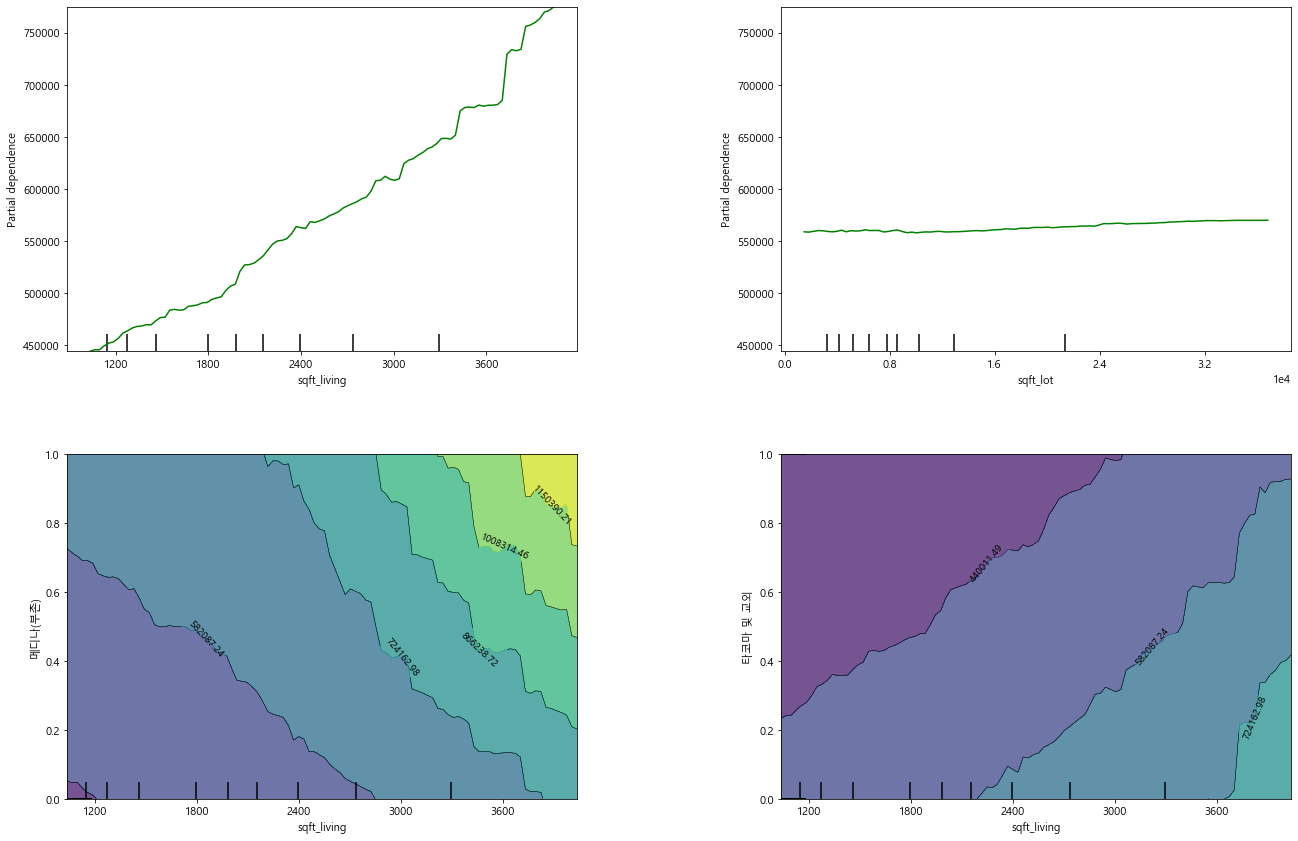

In [125]:
fig= plt.figure(figsize=(20,20))
sample_index = sample_without_replacement(n_population=21613,n_samples=200)
features = [2,3,(2,14),(2,15)] #튜플형태로 넣어줌으로써 two-way pdp를 그릴 수 있음
plot_partial_dependence(ada,x_dt.iloc[sample_index,:],features=features,feature_names=x_dt.columns,n_cols=2,fig=fig)
plt.show()

가격에 영향을 미치는 것은 부지크기(sqft_lot)보다는 집크기(sqft_living)이다\
\
two-way pdp\
x축 y축은 가격에 미치는 영향을 확인하고 싶은 설명변수들이 오고, 가격은 색깔과 등고선으로서 표현됨\
메디나(부촌)에 있는 집의 경우 평수에 따른 가격의 변화가 큼\
타코마 근교(공업지역) 및 교외(농장)에 있는 집의 경우 평수에 따른 가격의 변화가 크지않음

## < (참고) ICE plot >

Whereas PD plots provide a coarse view of a model’s workings, ICE plots enable you to drill down to the level of individual observations. Essentially, ICE plots disaggregate the PD function (which, after all, is an average) to reveal interactions and individual differences. To avoid visualization overload, ICE plots show one model variable at a time.  

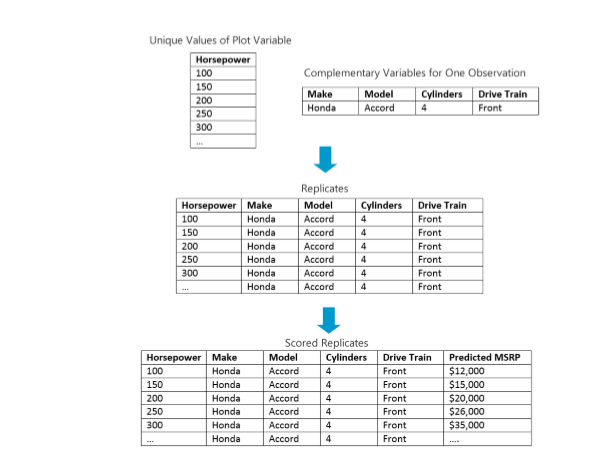

다른조건이 고정 되있고  관심변수만 변할 때 목표값의 변화량

## 주의점 
점수가 낮은 모델의 경우 해석에 bias가 있음

lime분석함수\
exp = explainer.explain_instance(x_dt.values[i],ada.predict, num_features=5)\
pdp분석함수\
plot_partial_dependence(ada, x_dt,features=features,feature_names=x_dt.columns,n_cols=2,fig=fig)

두 함수 모두에 실제 y값(true y)은 들어가지 않음\
따라서 진짜 y값 없이 모델의 예측값과 설명변수만 가지고 분석하기에 분석 결과는 모델이 true model이라는 가정하에서 이뤄져야 함\
예측값과 실제 y값의 괴리가 클 경우(모델의 예측력이 낮을 경우) 그만큼 잘못된 분석이 될것임